In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [28]:
library = pd.read_csv('Csv_files/library_8k_songs.csv')
library.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.817,0.669,0,-4.278,0,0.1000,0.105,0.000001,0.2470,0.693,106.934,audio_features,5gOtq0sKU24ZF8hnXlSp1V,spotify:track:5gOtq0sKU24ZF8hnXlSp1V,https://api.spotify.com/v1/tracks/5gOtq0sKU24Z...,https://api.spotify.com/v1/audio-analysis/5gOt...,181550,4
1,1,0.870,0.479,9,-7.779,1,0.1650,0.161,0.000157,0.2090,0.717,104.059,audio_features,0HaRLPnr887lcQM2YQzkff,spotify:track:0HaRLPnr887lcQM2YQzkff,https://api.spotify.com/v1/tracks/0HaRLPnr887l...,https://api.spotify.com/v1/audio-analysis/0HaR...,159124,4
2,2,0.481,0.660,6,-10.189,1,0.0761,0.350,0.000000,0.1080,0.504,111.832,audio_features,0GfCR4T6WOErZOw1557ln7,spotify:track:0GfCR4T6WOErZOw1557ln7,https://api.spotify.com/v1/tracks/0GfCR4T6WOEr...,https://api.spotify.com/v1/audio-analysis/0GfC...,159100,4
3,3,0.541,0.667,2,-7.821,1,0.1310,0.347,0.000001,0.0591,0.831,155.117,audio_features,2AKS1HhpLu2rgkojECUm3V,spotify:track:2AKS1HhpLu2rgkojECUm3V,https://api.spotify.com/v1/tracks/2AKS1HhpLu2r...,https://api.spotify.com/v1/audio-analysis/2AKS...,207475,5
4,4,0.711,0.725,3,-8.315,0,0.0941,0.424,0.129000,0.1100,0.530,105.016,audio_features,1wADwLSkYhrSmy4vdy6BRn,spotify:track:1wADwLSkYhrSmy4vdy6BRn,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,https://api.spotify.com/v1/audio-analysis/1wAD...,183057,4


In [43]:
na_cols = library.isna().sum()
na_cols

Unnamed: 0          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [19]:
duplicat = library.duplicated(keep=False)
len(duplicat)

8517

In [45]:
for row in duplicat.keys():
    if row == True:
        print(row, duplicat[row])

1 False


In [29]:
library.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000
mean,4258.000000,0.763056,0.656264,5.098509,-6.719232,0.406246,0.118384,0.249106,0.025028,0.139813,0.644658,114.614231,192285.029118,4.044734
std,2458.790455,0.118590,0.119656,3.445379,2.136200,0.491160,0.086859,0.188423,0.089206,0.099481,0.170836,25.960126,42418.003129,0.296360
min,0.000000,0.366000,0.204000,0.000000,-19.917000,0.000000,0.030200,0.004190,0.000000,0.030600,0.128000,46.877000,100174.000000,3.000000
25%,2129.000000,0.699000,0.574000,2.000000,-7.779000,0.000000,0.053800,0.093500,0.000004,0.088500,0.530000,101.970000,166154.000000,4.000000
50%,4258.000000,0.794000,0.661000,5.000000,-6.667000,0.000000,0.089100,0.226000,0.000324,0.104000,0.643000,108.028000,184000.000000,4.000000
75%,6387.000000,0.844000,0.732000,8.000000,-5.382000,1.000000,0.159000,0.369000,0.004070,0.142000,0.780000,115.997000,211050.000000,4.000000
max,8516.000000,0.966000,0.973000,11.000000,0.074000,1.000000,0.444000,0.916000,0.879000,0.618000,0.967000,201.944000,480000.000000,5.000000


### Feature Correlation
This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

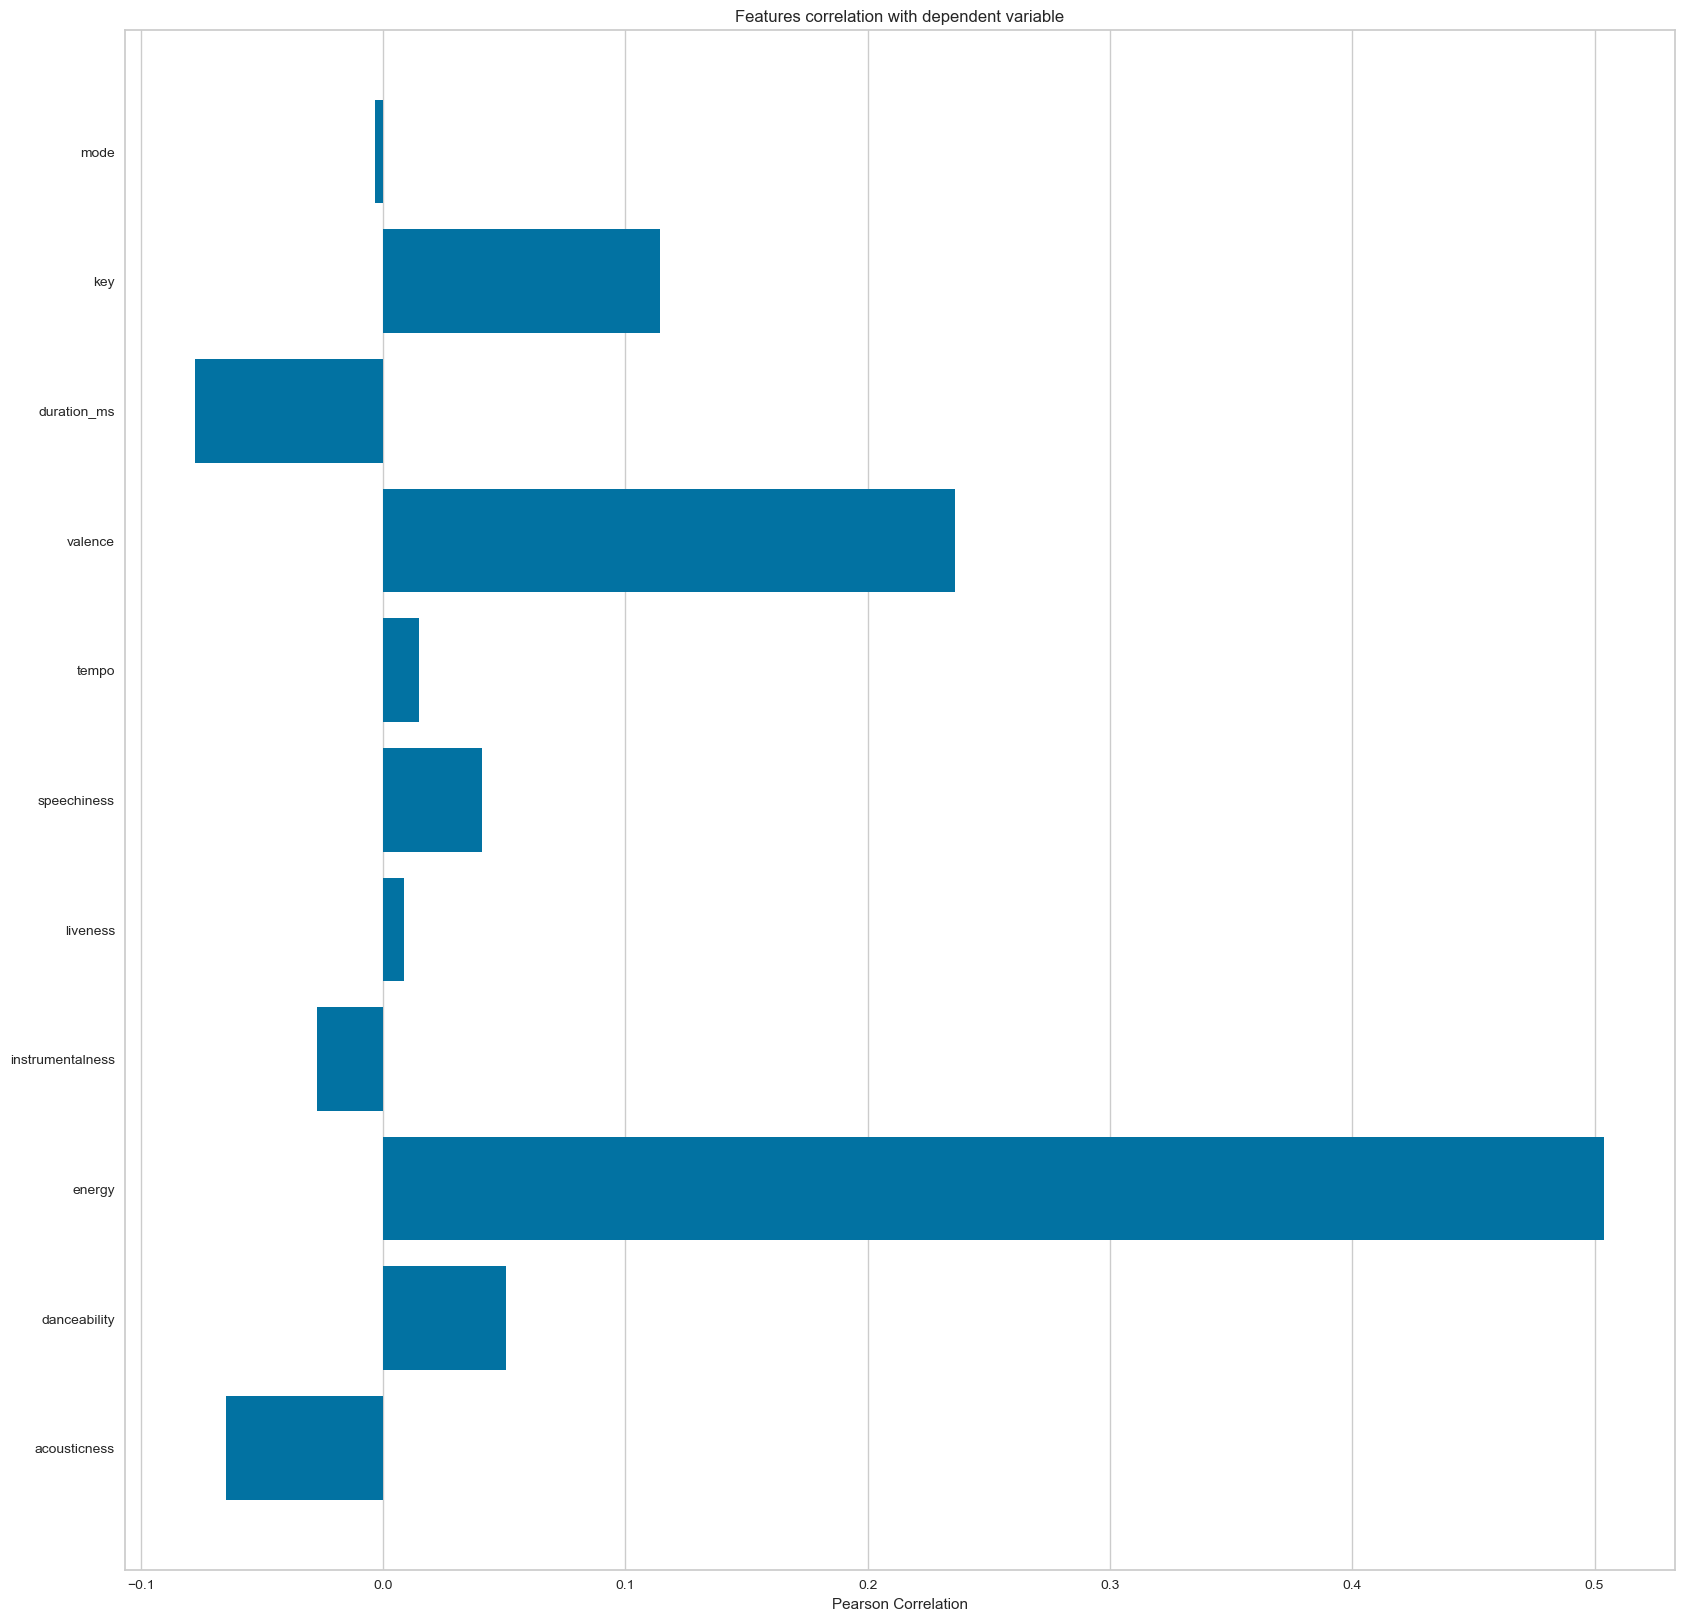

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [6]:
from yellowbrick.target import FeatureCorrelation

feature_names = [ 'acousticness','danceability', 'energy', 'instrumentalness',
       'liveness',  'speechiness', 'tempo', 'valence','duration_ms','key','mode',]

X, y = library[feature_names], library['loudness']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

# Method 1
Cluster pipeline

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=15, random_state=1234))])
X = library.select_dtypes(np.number)
cluster_pipeline.fit(X)
library['cluster'] = cluster_pipeline.predict(X)

In [10]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['loudness'] = library['loudness']
projection['cluster'] = library['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'loudness'])
fig.show()

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8517 samples in 0.044s...
[t-SNE] Computed neighbors for 8517 samples in 2.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8517
[t-SNE] Computed conditional probabilities for sample 2000 / 8517
[t-SNE] Computed conditional probabilities for sample 3000 / 8517
[t-SNE] Computed conditional probabilities for sample 4000 / 8517
[t-SNE] Computed conditional probabilities for sample 5000 / 8517
[t-SNE] Computed conditional probabilities for sample 6000 / 8517
[t-SNE] Computed conditional probabilities for sample 7000 / 8517
[t-SNE] Computed conditional probabilities for sample 8000 / 8517
[t-SNE] Computed conditional probabilities for sample 8517 / 8517
[t-SNE] Mean sigma: 0.767072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.615627
[t-SNE] KL divergence after 1000 iterations: 0.295936


In [11]:
library.to_csv('library_cluster_15.csv')

In [31]:
audio_features=library[['danceability', 'energy','key', 'loudness', 'mode' , 'tempo']]
audio_features

,danceability,energy,key,loudness,mode,tempo
0,0.817,0.669,0,-4.278,0,106.934
1,0.870,0.479,9,-7.779,1,104.059
2,0.481,0.660,6,-10.189,1,111.832
3,0.541,0.667,2,-7.821,1,155.117
4,0.711,0.725,3,-8.315,0,105.016
...,...,...,...,...,...,...
8512,0.792,0.793,5,-5.731,0,110.874
8513,0.712,0.497,1,-8.106,1,128.385
8514,0.541,0.667,2,-7.821,1,155.117
8515,0.840,0.842,5,-2.641,0,125.104


# Method 2
k means method scatter

In [32]:
scaler = StandardScaler()
scaler.fit(audio_features)
audio_features_scaled = scaler.transform(audio_features)
len(audio_features_scaled)

8517

In [33]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model_final/scaler_8k_songs_6featur.pickle", "wb") as f: #saves the model in dir and file name given
    pickle.dump(scaler,f)

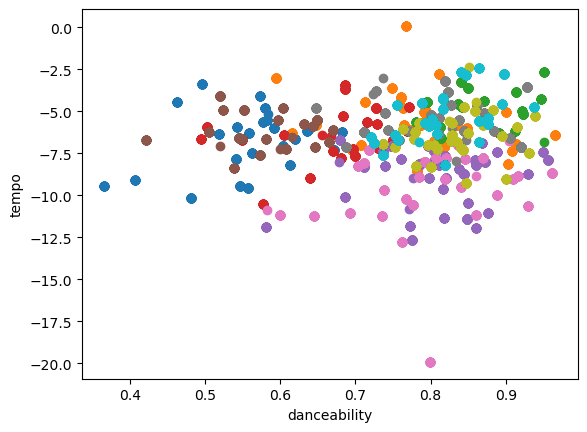

In [40]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(audio_features_scaled)
# assign a cluster to each example
labels = kmeans.predict(audio_features_scaled)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(audio_features.to_numpy()[row_ix, 0], audio_features.to_numpy()[row_ix,3])
    pyplot.xlabel("danceability")
    pyplot.ylabel("tempo")
    # show the plot
pyplot.show()

In [24]:
with open("Model_final/kmeans_11clusters_8k.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [25]:
clusters = kmeans.predict(audio_features_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index() #finding frequency

0      895
1      795
2      718
3     1220
4      864
5      339
6      122
7      608
8     1994
9      650
10     312
dtype: int64

In [26]:
library['clusters'] = clusters
library.to_csv('Csv_files/library_cluster_11_8ksongs_9featur.csv')

In [27]:
library.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,0,0.817,0.669,0,-4.278,0,0.1000,0.105,0.000001,0.2470,0.693,106.934,audio_features,5gOtq0sKU24ZF8hnXlSp1V,spotify:track:5gOtq0sKU24ZF8hnXlSp1V,https://api.spotify.com/v1/tracks/5gOtq0sKU24Z...,https://api.spotify.com/v1/audio-analysis/5gOt...,181550,4,8
1,1,0.870,0.479,9,-7.779,1,0.1650,0.161,0.000157,0.2090,0.717,104.059,audio_features,0HaRLPnr887lcQM2YQzkff,spotify:track:0HaRLPnr887lcQM2YQzkff,https://api.spotify.com/v1/tracks/0HaRLPnr887l...,https://api.spotify.com/v1/audio-analysis/0HaR...,159124,4,3
2,2,0.481,0.660,6,-10.189,1,0.0761,0.350,0.000000,0.1080,0.504,111.832,audio_features,0GfCR4T6WOErZOw1557ln7,spotify:track:0GfCR4T6WOErZOw1557ln7,https://api.spotify.com/v1/tracks/0GfCR4T6WOEr...,https://api.spotify.com/v1/audio-analysis/0GfC...,159100,4,9
3,3,0.541,0.667,2,-7.821,1,0.1310,0.347,0.000001,0.0591,0.831,155.117,audio_features,2AKS1HhpLu2rgkojECUm3V,spotify:track:2AKS1HhpLu2rgkojECUm3V,https://api.spotify.com/v1/tracks/2AKS1HhpLu2r...,https://api.spotify.com/v1/audio-analysis/2AKS...,207475,5,2
4,4,0.711,0.725,3,-8.315,0,0.0941,0.424,0.129000,0.1100,0.530,105.016,audio_features,1wADwLSkYhrSmy4vdy6BRn,spotify:track:1wADwLSkYhrSmy4vdy6BRn,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,https://api.spotify.com/v1/audio-analysis/1wAD...,183057,4,9


# 6. Build The Elbow graph to find the best K

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means model with 24 clusters! 

Training a K-Means model with 25 clusters! 

Training a K-Means model with 26 clusters! 

Training a K-Me

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

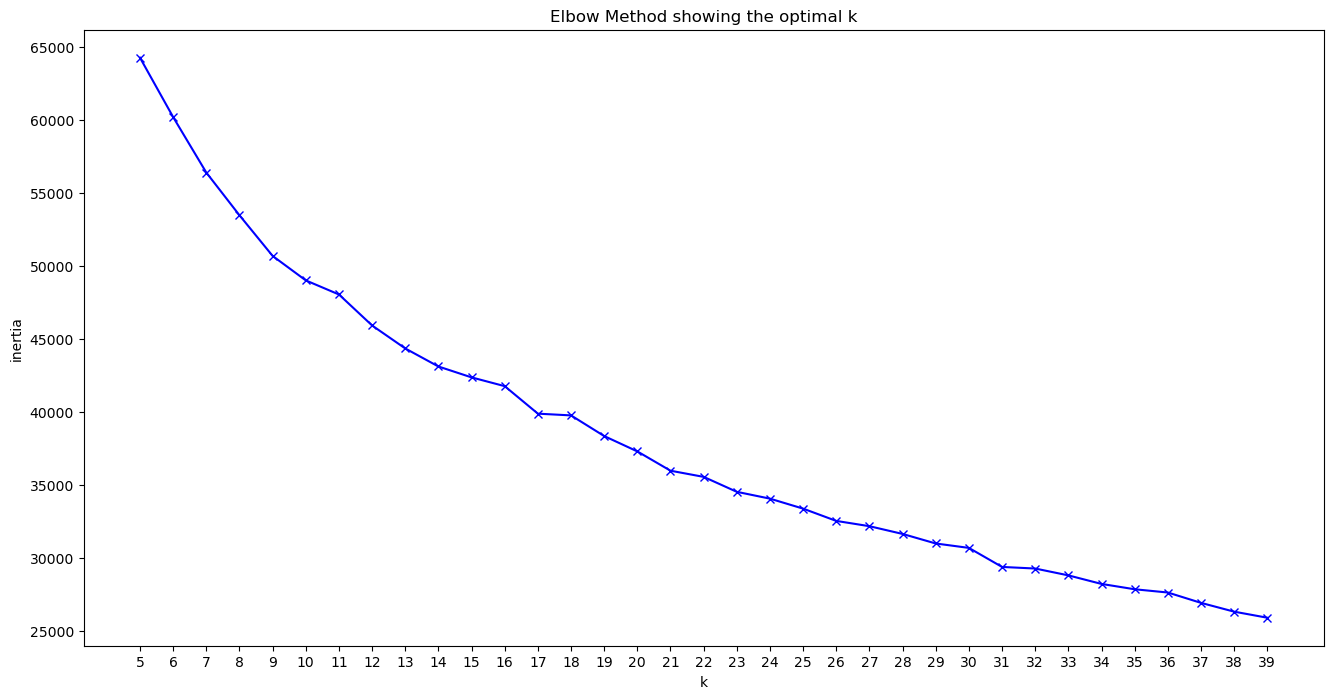

In [10]:
K = range(5, 40) 
inertia = []

for k in K: #for every data in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) #changing the scale
plt.title('Elbow Method showing the optimal k')

# Silhoutte method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

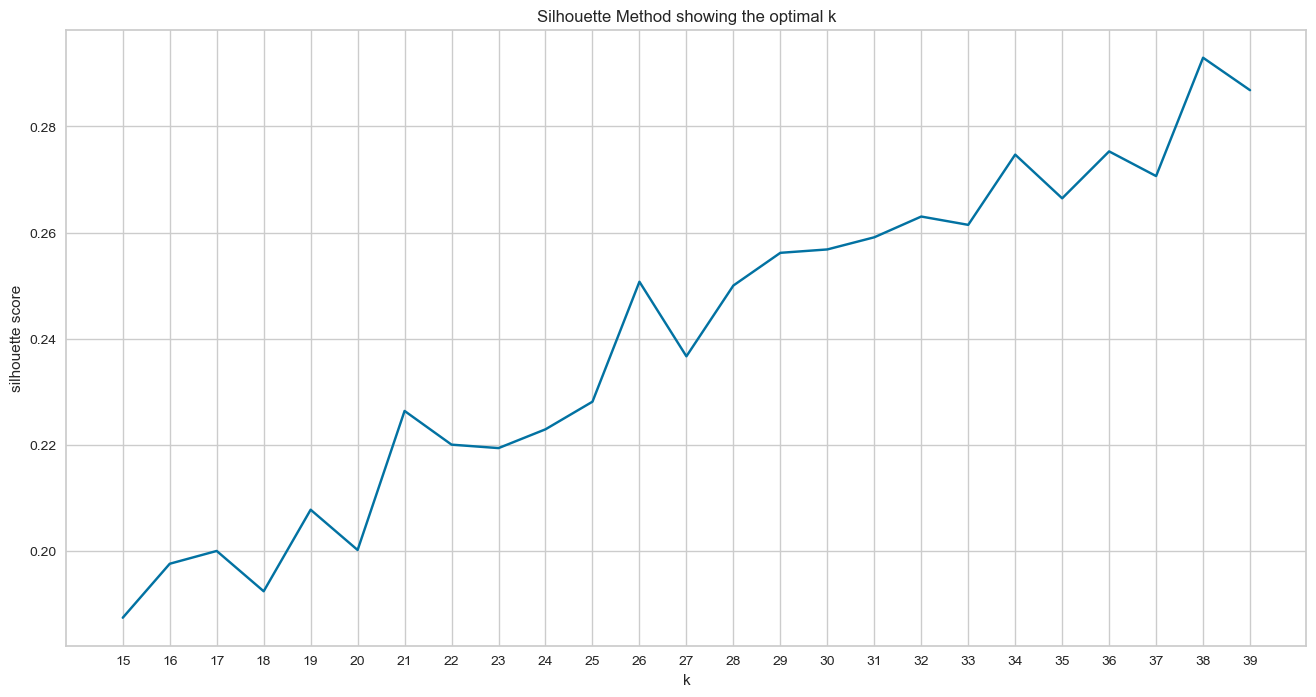

In [38]:
K = range(15, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(audio_features_scaled, kmeans.predict(audio_features_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [39]:
n_clusters

NameError: name 'n_clusters' is not defined

In [41]:
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence',]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(library[feature_cols])

print(normalized_df[:2])

[[1.10560314e-01 7.51666667e-01 2.14245470e-01 6.04681404e-01
  1.42207053e-06 0.00000000e+00 3.68403132e-01 7.82302036e-01
  0.00000000e+00 1.68680522e-01 3.87297104e-01 5.00000000e-01
  6.73420739e-01]
 [1.71976618e-01 8.40000000e-01 1.55202645e-01 3.57607282e-01
  1.78612059e-04 8.18181818e-01 3.03711270e-01 6.07173228e-01
  1.00000000e+00 3.25761237e-01 3.68756731e-01 5.00000000e-01
  7.02026222e-01]]


In [16]:
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [17]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(library.index, index=library['id']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)

def generate_recommendation(song_title, model_type=cosine ):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    # Get song indices
    index=indices[song_title]
    # Get list of songs for given songs
    score=list(enumerate(model_type[indices['1yOt3NUFWpYbnFW6ISj59h']]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-10 recommend songs
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 10 recommende songs
    top_songs=library['song_id'].iloc[top_songs_index]
    return top_songs

NameError: name 'normalized_df' is not defined

In [50]:
print("Recommended Songs:")
print(generate_recommendation('1yOt3NUFWpYbnFW6ISj59h',cosine).values)

Recommended Songs:


KeyError: '2SiXAy7TuUkycRVbbWDEpo'

In [49]:
# Create sigmoid kernel matrix based on given matrix
sig_kernel = sigmoid_kernel(normalized_df)

print("Recommended Songs:")
print(generate_recommendation('2SiXAy7TuUkycRVbbWDEpo',sig_kernel).values)

Recommended Songs:


KeyError: '2SiXAy7TuUkycRVbbWDEpo'